# Classification Task Instruction 
In this task, you will get a sense of using Python to solve some classification problems.
The dataset that we will be working with is from a Portuguese banking institution about its direct marketing campaigns. 
The **goal** is to predict, if a client will subscribe a term deposit (denoted in **variable y**) or not.


## 1. Dataset Information
Below is the explanation of our variables from the dataset:

### bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes :
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes from dataset with **full features**
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Citation:
[[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

## 2. Task
The steps below are served as a guidance to solve this problem. They are by no means a must or the only way to solve this partcular dataset. Feel free to use what you have learned in the previous classrooms and to be creative. Try to find out your own approach to this problem.

1. **Step 1: Data loading & Preprocessing**
    - load the data into Python Notebook and convert it to the appropriate format (dataframe, numpy.array, list, etc.)
    - observe & explore the dataset, understand each variable and its meaning
    - don't forget the special treatment to null values
    - separate variables & labels


2. **Step 2: Data Visualisation & Exploration**
    - make use of learned visualisation skills to learn what is happening in your dataset
    - maybe we can already have some findings


2. **Step 3: Data modelling**
    - split dataset into training & testing dataset
    - pick one data modelling approach respectively the Python modelling package that you would like to use
    - fit the training dataset to the model and train the model
    - output the model 
    - make prediction on testing dataset


3. **Step 4: Fine tune the model or use more advanced model**
    - map the prediction of the testing dataset against real numbers from your dataset and compare the result
    - make adjustments on your model for a better result (but make sure don't overfit the model)


4. **Step 5: Result extration & interpretation**
    - make your conclusions and interpretation on the model and final results
    - evaluate the performance of your model and algorithm using different KPIs 


## 3. Additional Resources:
- you can take a look at one of the use cases that AA tribe had done in the past and get a sense of how the modelling approach feels like: general description of the modelling approach: <https://wiki.rbinternational.corp/confluence/display/AAT/Modelling+approach+RBBG>    
    - random forest approach: <https://wiki.rbinternational.corp/confluence/display/AAT/Random+Forest+Modelling+Approach>
    - gradient boosting approach:  <https://wiki.rbinternational.corp/confluence/display/AAT/Gradient+Boosting+Modelling+Approach>
- some of the modelling methods that you can go over:
    - random forest : https://www.youtube.com/watch?v=J4Wdy0Wc_xQ
        - for random forest, please first understand [decision trees](https://en.wikipedia.org/wiki/Decision_tree#:~:text=A%20decision%20tree%20is%20a,only%20contains%20conditional%20control%20statements.) completely
    - gradient boosting: https://www.youtube.com/watch?v=3CC4N4z3GJc
    - support vector machine: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

**Packages that might be useful for you:**
- pandas
- numpy
- scikit-learn
- sklearn
- sklearn.datasets
- sklearn.ensemble
- xgboost (installation necessary)

**Useful links:**
- subsetting dataset in pandas: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
- https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [1]:

#Preprocessing
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import numpy as np
import csv

#Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,12)
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

#Machine Learning
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree




In [3]:
data_additional_full = pd.read_csv("bank-additional-full.csv", sep=";")

**Data exploration**

In [4]:
data_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 1. Data import and inspection

In [5]:
data_additional_full.shape

(41188, 21)

In [6]:
data_additional_full.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Columns: 21 entries, age to y
dtypes: float64(5), int64(5), object(11)
memory usage: 6.6+ MB


In [7]:
data_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
data_additional_full.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [9]:
yes_data = data_additional_full['y']=='yes'
print(yes_data.head())

0    False
1    False
2    False
3    False
4    False
Name: y, dtype: bool


**2. Exploratory Data Analysis**

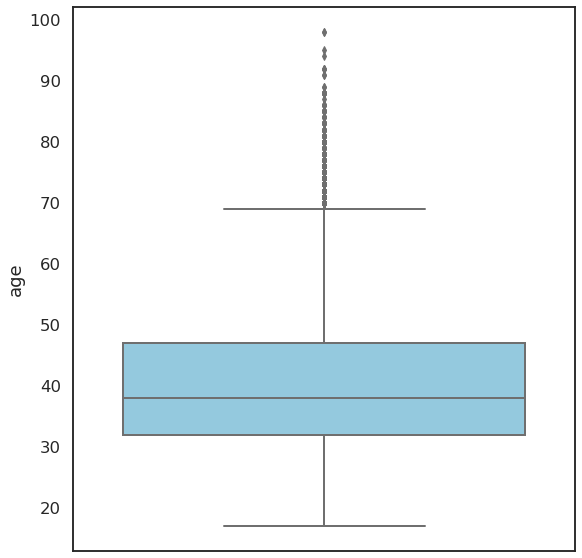

In [10]:
plt.figure(figsize = (9,10))

sns.boxplot(data_additional_full['age'], orient = 'v', linewidth = 2, color ='skyblue');
#Most of the clients are in the productive age. between early -30s and late 40s, with some significant outliers among the pensioners

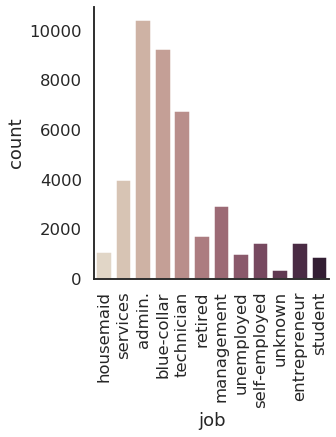

In [11]:

g = sns.catplot(x="job", kind="count", palette="ch:.25", data=data_additional_full)
g.set_xticklabels(rotation=90)
# Majority of the clients have admin, blue-collar and technician jobs, with minority self-employed or enterpreneurs

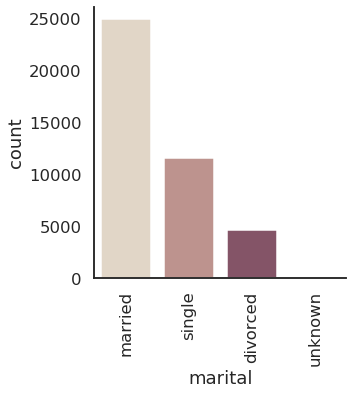

In [12]:
g = sns.catplot(x="marital", kind="count", palette="ch:.25", data=data_additional_full)
g.set_xticklabels(rotation=90)
# mmost of the clients are married, around one thirs is single or divorced

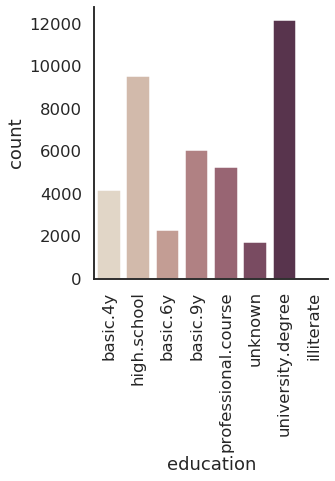

In [13]:
g = sns.catplot(x="education", kind="count", palette="ch:.25", data=data_additional_full)
g.set_xticklabels(rotation=90)
# Most of the clients have university education or a high school

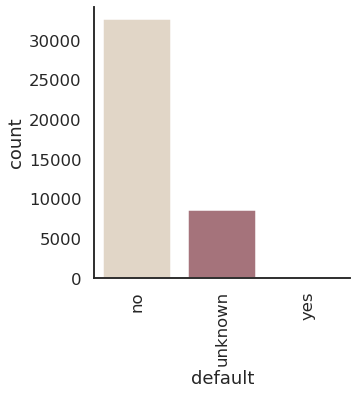

In [14]:
g = sns.catplot(x="default", kind="count", palette="ch:.25", data=data_additional_full)
g.set_xticklabels(rotation=90)
#Almost none of the clients are in default

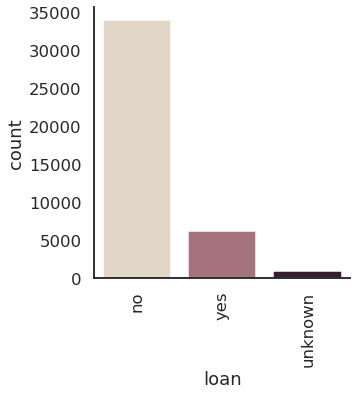

In [15]:
g = sns.catplot(x="loan", kind="count", palette="ch:.25", data=data_additional_full)
g.set_xticklabels(rotation=90)
# only around 1/8 of clients have a loan previously

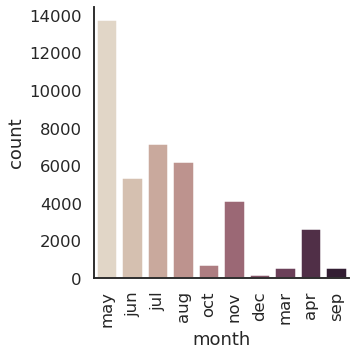

In [16]:
g = sns.catplot(x="month", kind="count", palette="ch:.25", data=data_additional_full)
g.set_xticklabels(rotation=90)
#Most of the client interactions were in the summer

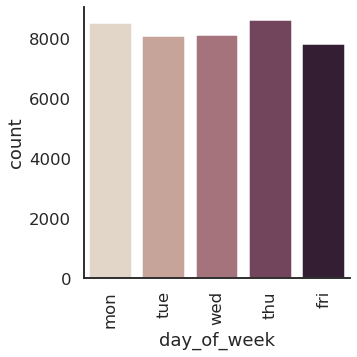

In [17]:
g = sns.catplot(x="day_of_week", kind="count", palette="ch:.25", data=data_additional_full)
g.set_xticklabels(rotation=90)
#The days of week were evenly distributed

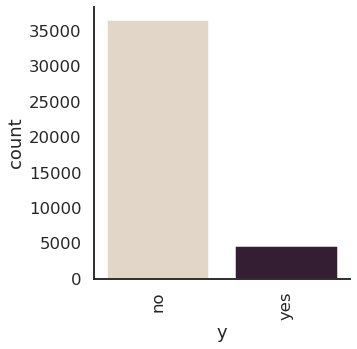

In [18]:
g = sns.catplot(x="y", kind="count", palette="ch:.25", data=data_additional_full)
g.set_xticklabels(rotation=90)
#around 1/8 of the clients accepted the product

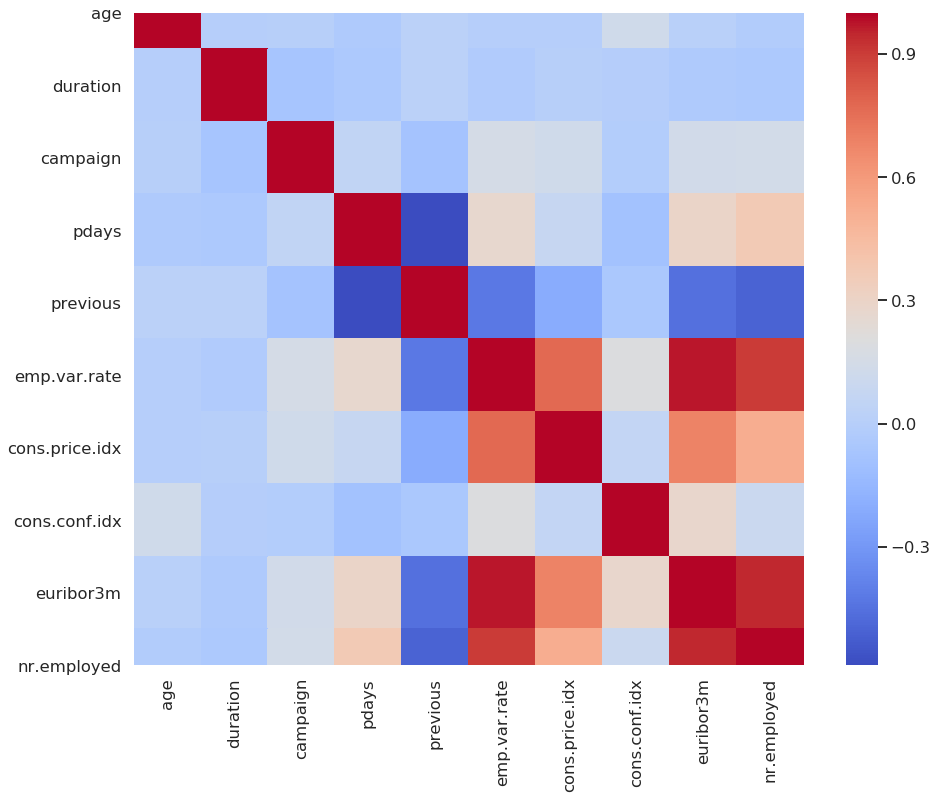

In [19]:
sns.heatmap(
    data_additional_full.corr(),
    cmap="coolwarm"
)
plt.show()
#Low correlations between variables related to individuals, but high macro correlations

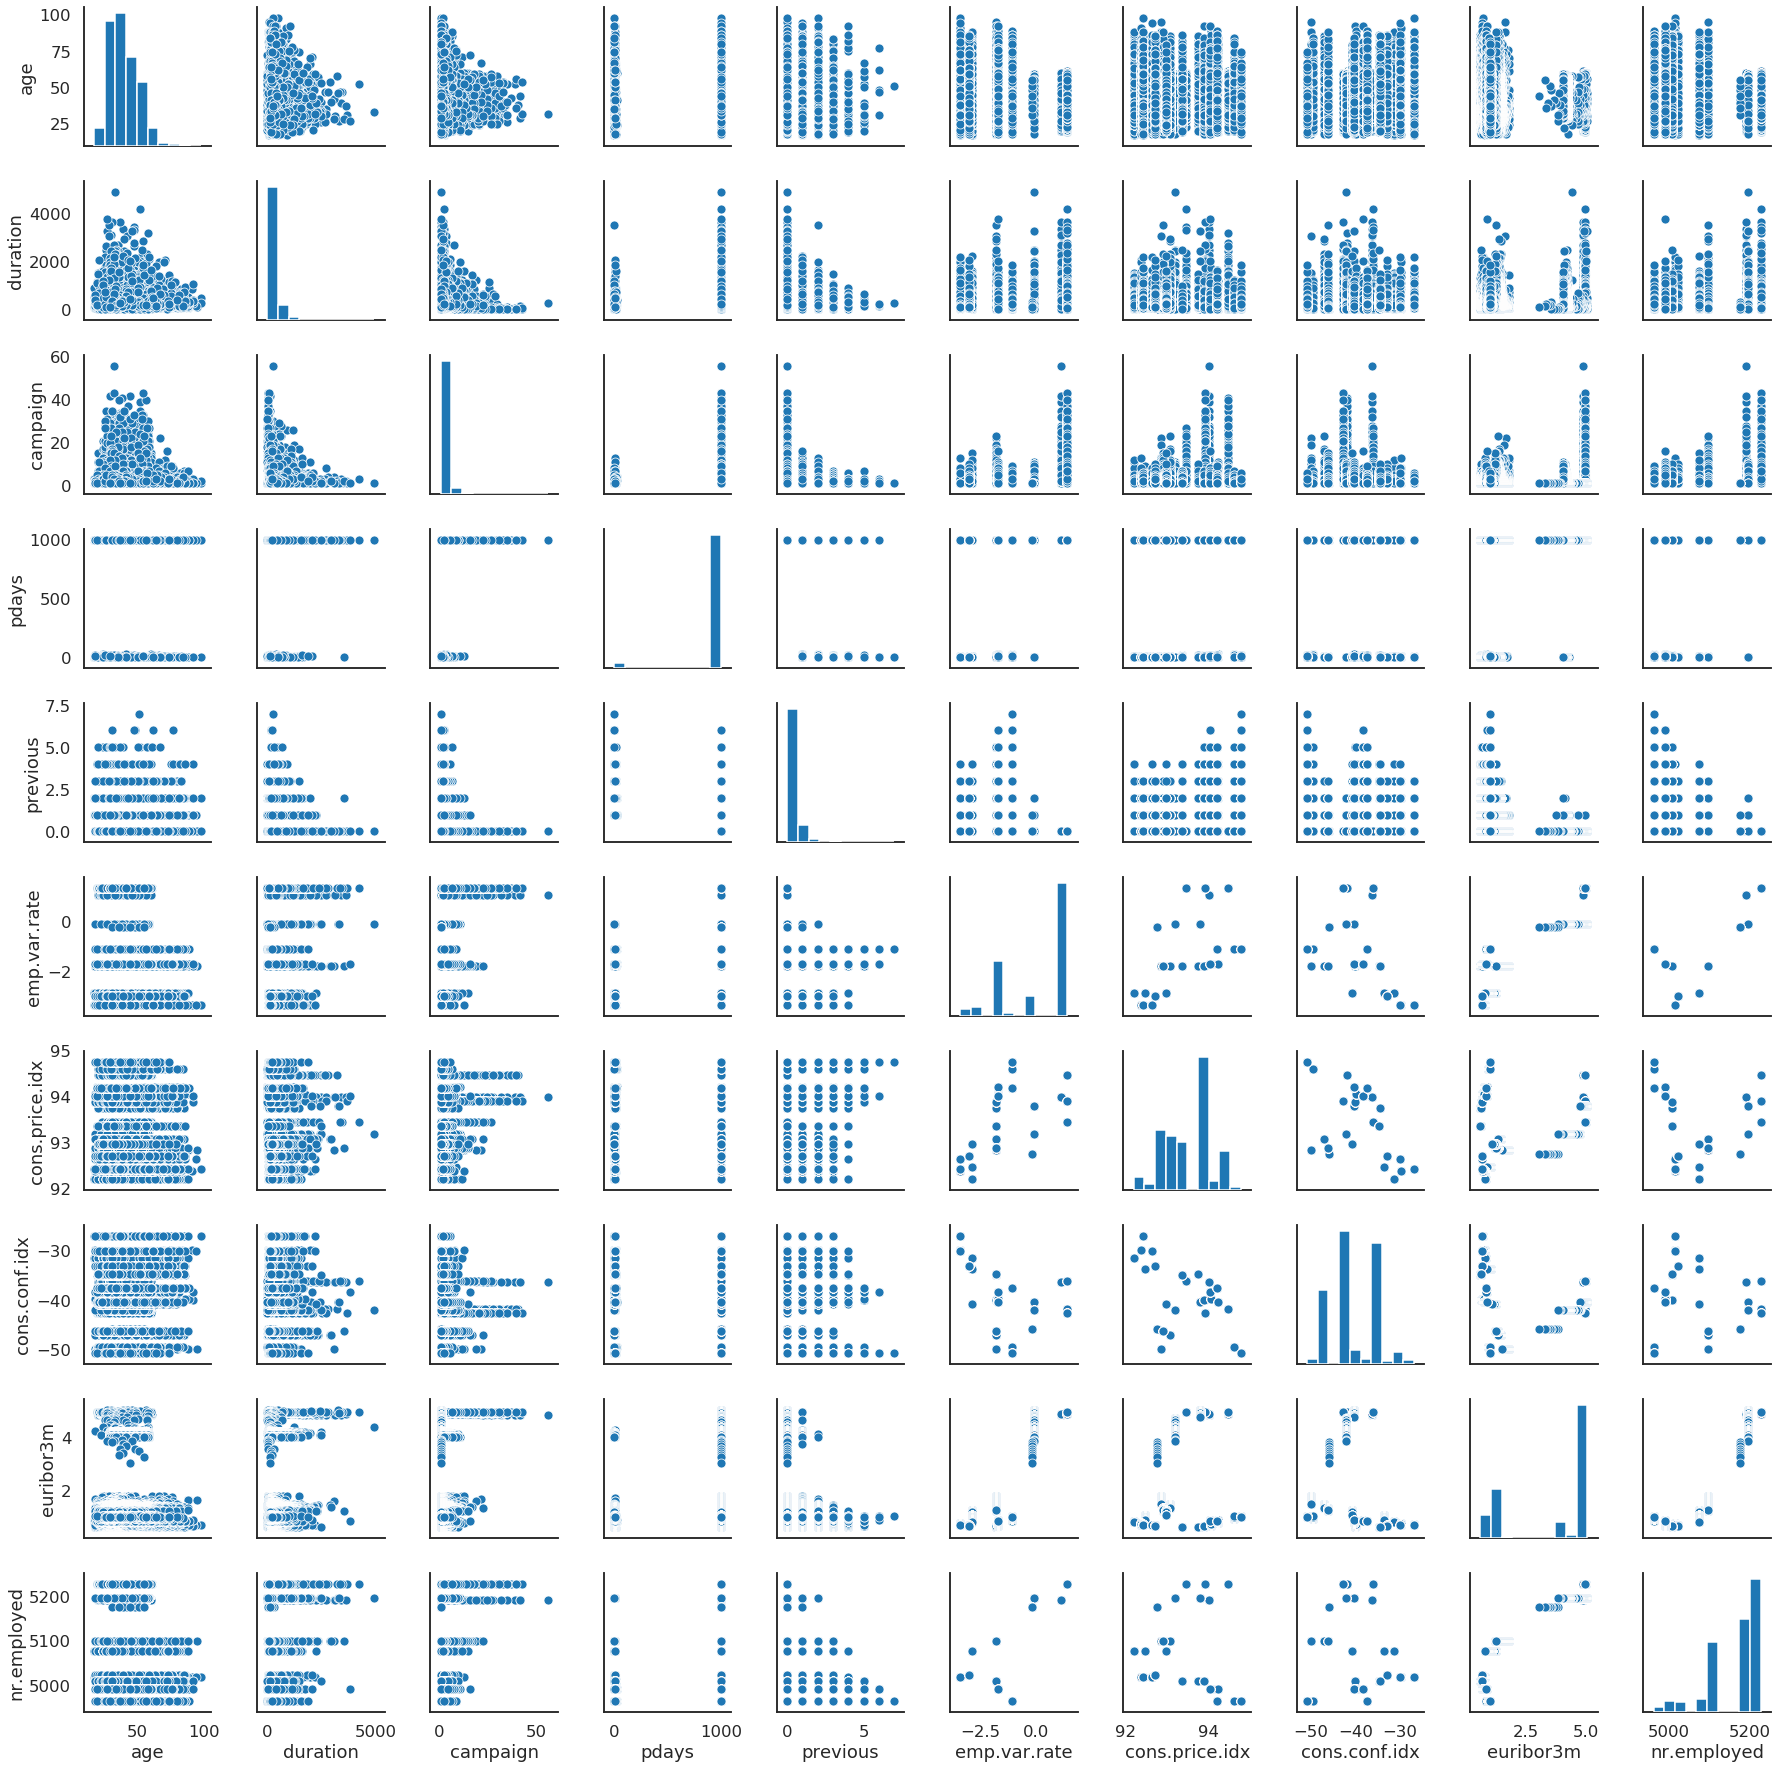

In [20]:
sns.pairplot(data_additional_full)

Quite a few features were interesting....

### Bivariate

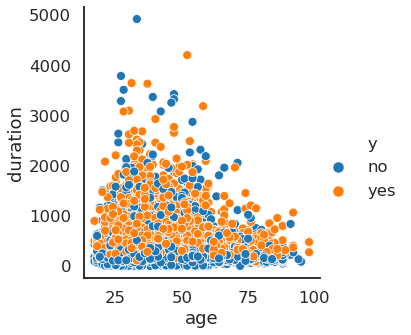

In [51]:
sns.relplot(
    data=data_additional_full, 
    x="age", 
    y="duration", 
    kind="scatter",
    hue="y")
plt.show()
# it seems it takes a longer duration to accept the product

[Text(0, 0, 'housemaid'),
 Text(0, 0, 'services'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'management'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'student')]

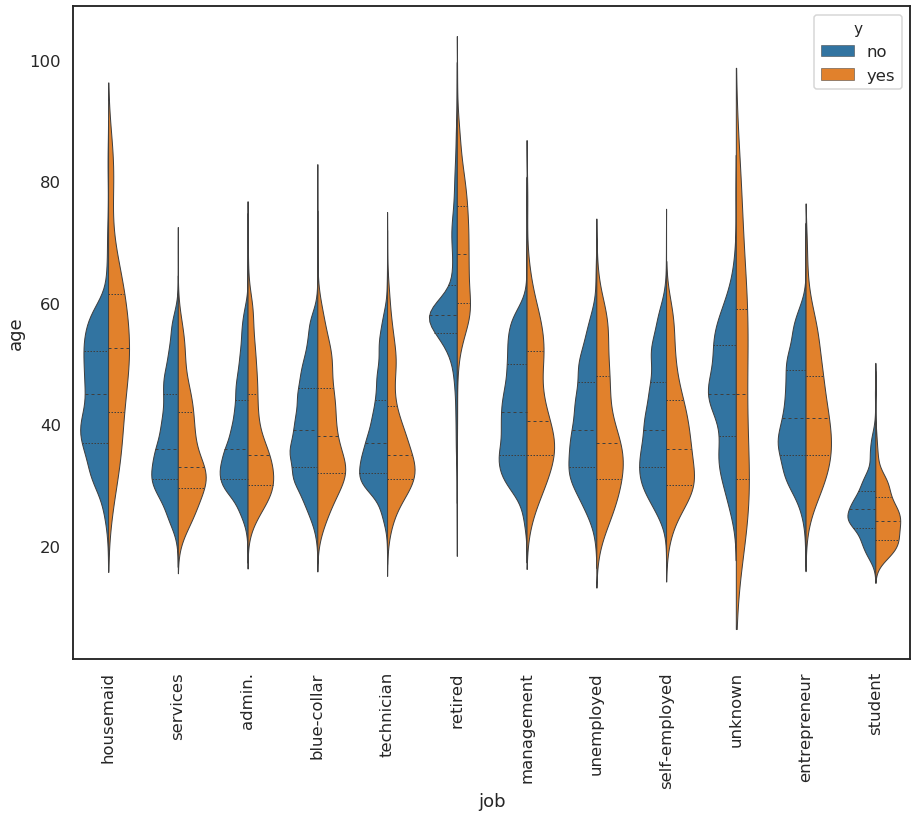

In [52]:
g = sns.violinplot(data=data_additional_full, x="job", y="age", hue="y",
               split=True, inner="quart", linewidth=1)


g.set_xticklabels(g.get_xticklabels(),rotation=90)
#high acceptance rate among older retirees and also blue collar and technicians

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

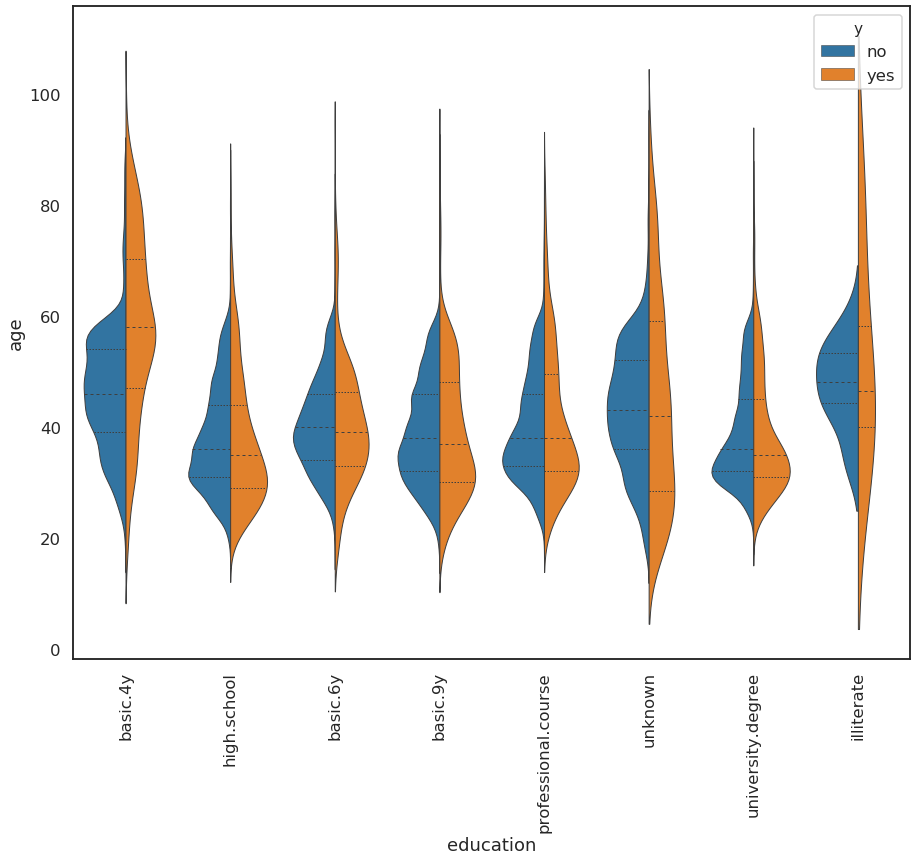

In [53]:
g = sns.violinplot(data=data_additional_full, x="education", y="age", hue="y",
               split=True, inner="quart", linewidth=1)


g.set_xticklabels(g.get_xticklabels(),rotation=90)
#High acceptance rate among the professional course education and high school

[Text(0, 0, 'married'),
 Text(0, 0, 'single'),
 Text(0, 0, 'divorced'),
 Text(0, 0, 'unknown')]

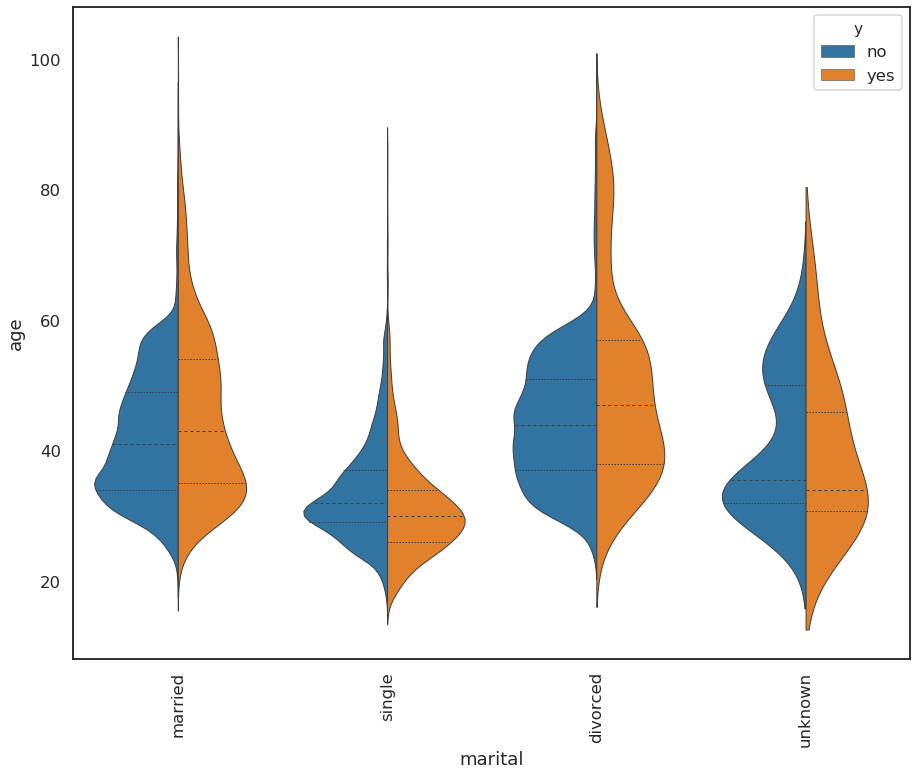

In [54]:
g = sns.violinplot(data=data_additional_full, x="marital", y="age", hue="y",
               split=True, inner="quart", linewidth=1)


g.set_xticklabels(g.get_xticklabels(),rotation=90)
# the acceptance rate seems to increase with the age

[Text(0, 0, 'may'),
 Text(0, 0, 'jun'),
 Text(0, 0, 'jul'),
 Text(0, 0, 'aug'),
 Text(0, 0, 'oct'),
 Text(0, 0, 'nov'),
 Text(0, 0, 'dec'),
 Text(0, 0, 'mar'),
 Text(0, 0, 'apr'),
 Text(0, 0, 'sep')]

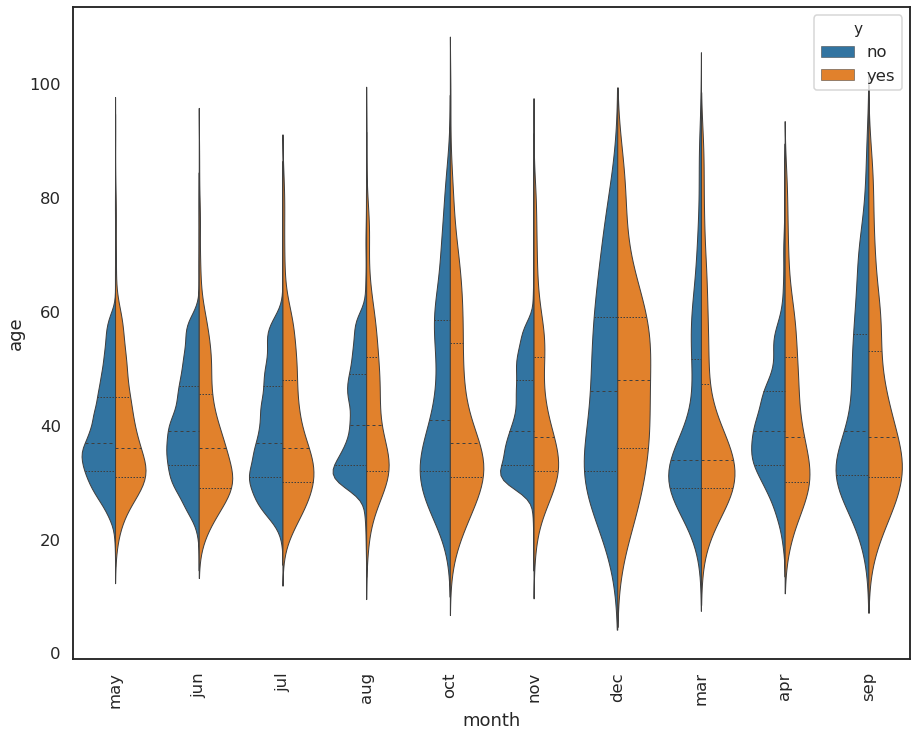

In [57]:
g = sns.violinplot(data=data_additional_full, x="month", y="age", hue="y",
               split=True, inner="quart", linewidth=1)


g.set_xticklabels(g.get_xticklabels(),rotation=90)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '999')]

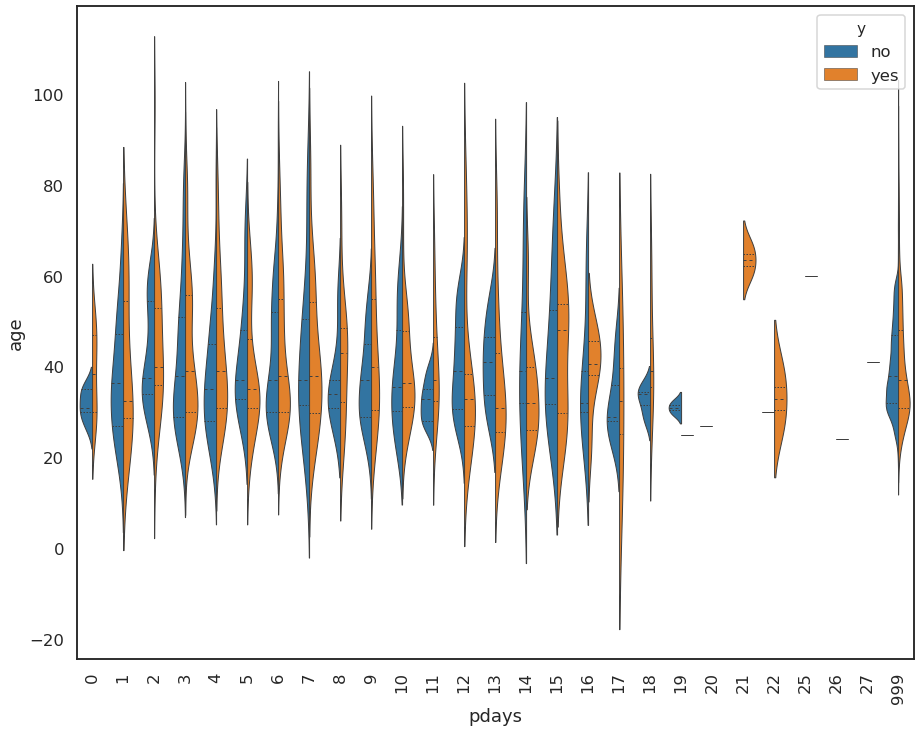

In [58]:
g = sns.violinplot(data=data_additional_full, x="pdays", y="age", hue="y",
               split=True, inner="quart", linewidth=1)


g.set_xticklabels(g.get_xticklabels(),rotation=90)

It seems from the exploratory data analysis, that the target group should be blue collar workers with high school education and surprisingly retirees. 

**3. Machine Learning**

In [68]:
X= data_additional_full.iloc[:,0:20]
y= data_additional_full['y']
#Data preparation

In [69]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
print(X_df.head())

   age        job  marital    education  default housing loan    contact month day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0   56  housemaid  married     basic.4y       no      no   no  telephone   may         mon       261         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0
1   57   services  married  high.school  unknown      no   no  telephone   may         mon       149         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0
2   37   services  married  high.school       no     yes   no  telephone   may         mon       226         1    999         0  nonexistent           1.1          93.994          -36.4      4.857       5191.0
3   40     admin.  married     basic.6y       no      no   no  telephone   may         mon       151         1    999         0  nonexistent           1.1      

**3.1 Dummy Classifier**

In [70]:
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
dummy_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DummyClassifier(strategy="most_frequent"))])

X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_df, y_df, test_size=0.2)

X_train_dummy.head()
y_train_dummy.head()

dummy_clf.fit(X_train_dummy, y_train_dummy)
print("model score: %.3f" % dummy_clf.score(X_test_dummy, y_test_dummy))

model score: 0.890


In [71]:
set_config('diagram')
dummy_clf

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

**3.1.2 Dummy Claasifier Evaluation**

In [72]:
y_train_pred_dummy = cross_val_predict(dummy_clf, X_train_dummy, y_train_dummy, cv=5)

In [73]:
confusion_matrix(y_train_dummy, y_train_pred_dummy)
#I am not sure why there are no negatives in the matrix, needs some insight

array([[29220,     0],
       [ 3730,     0]])

**3.2.1 Random Forest**

In [30]:
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
forest_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(max_depth=10, random_state=0))])

X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X_df, y_df, test_size=0.2)

X_train_forest.head()
y_train_forest.head()

forest_clf.fit(X_train_forest, y_train_forest)
print("model score: %.3f" % forest_clf.score(X_test_forest, y_test_forest))

model score: 0.908


In [31]:
set_config('diagram')
forest_clf

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

**3.2.2.Random Forest evaluation**

In [32]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train_forest, y_train_forest, cv=5)

In [33]:
confusion_matrix(y_train_forest, y_train_pred_forest)

array([[28765,   463],
       [ 2555,  1167]])

In [34]:
precision_score(y_train_forest, y_train_pred_forest, average="binary", pos_label="yes")

0.7159509202453987

In [35]:
recall_score(y_train_forest, y_train_pred_forest, average="binary", pos_label="yes")

0.31354110693175713

In [36]:
f1_score(y_train_forest, y_train_pred_forest, average="binary", pos_label="yes")

0.43609865470852016

**3.3.1 Logistic regression**

In [37]:
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test_forest = train_test_split(X_df, y_df, test_size=0.2)

X_train.head()
y_train.head()

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test_forest))

model score: 0.916


In [38]:
set_config('diagram')
clf
#dummy classifier, decision tree, random forest, 

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

**3.3.2 Logistic regression evaluation**

In [39]:
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5)

In [40]:
confusion_matrix(y_train, y_train_pred)

array([[28393,   818],
       [ 2173,  1566]])

In [41]:
precision_score(y_train, y_train_pred, average="binary", pos_label="yes")

0.6568791946308725

In [42]:
recall_score(y_train, y_train_pred, average="binary", pos_label="yes")

0.41882856378710887

In [43]:
f1_score(y_train, y_train_pred, average="binary", pos_label="yes")

0.5115139637432632

 **3.4.1 Decision tree**

In [44]:
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
tree_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', tree.DecisionTreeClassifier())])

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_df, y_df, test_size=0.2)

X_train_tree.head()
y_train_tree.head()

tree_clf.fit(X_train_tree, y_train_tree)
print("model score: %.3f" % tree_clf.score(X_test_tree, y_test_tree))

model score: 0.888


**3.4.2 Decision Tree CLassifier evaluation**

In [45]:
y_train_pred = cross_val_predict(tree_clf, X_train_tree, y_train_tree, cv=5)

In [46]:
precision_score(y_train_tree, y_train_pred, average="binary", pos_label="yes")

0.5087301587301587

In [47]:
recall_score(y_train_tree, y_train_pred, average="binary", pos_label="yes")

0.5202922077922078

In [48]:
f1_score(y_train_tree, y_train_pred, average="binary", pos_label="yes")

0.5144462279293739

**4. Conclusions**

The dummy classifier served as a benchmark model with accuracy 0.89. The highest accuracy has the logistics regression with 0.916. However we are more interested in the highest recall score as want to capture all that accept the product. Therefore Decision tree would be preferred. Going forward the steps wuld be feature engineering with the model and grid search for the hyperparameters.